In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import StratifiedKFold,KFold,cross_validate
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score,GridSearchCV,train_test_split
import warnings
warnings.simplefilter(action='ignore')
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
df=pd.read_csv('DS2_C6_S3_CarSales_Data_Practice.csv')
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [4]:
num=list(df.select_dtypes(include=['float64','int64']).columns)
num

['Sales_in_thousands',
 '__year_resale_value',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor']

In [5]:
df2=df.copy()
df=df[num]
df2=df2.dropna()

In [6]:
df=df.dropna()

In [7]:
df.iloc[:,0:]=StandardScaler().fit_transform(df.iloc[:,0:])

In [8]:
df=df.drop('__year_resale_value',axis=1)
df.head()

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,-0.564554,-0.317230,-1.188519,-0.707601,-0.764273,-1.106603,-1.110752,-1.152084,-1.220853,0.884790,-0.648864
1,-0.263968,0.172510,0.143989,0.749354,0.096494,-0.253125,0.375767,0.324491,-0.162192,0.200734,0.640645
3,-0.676024,1.137795,0.429526,0.492244,0.907361,0.059816,0.644065,0.884513,0.049540,-0.483322,0.641385
4,-0.518017,-0.140498,-1.188519,-0.536195,-0.589625,-0.850559,-0.704679,-0.548336,-0.373924,0.656772,-0.473601
5,-0.539653,0.566432,-0.236728,0.320838,0.171343,1.396931,0.310505,0.398488,0.181873,-0.483322,0.375435


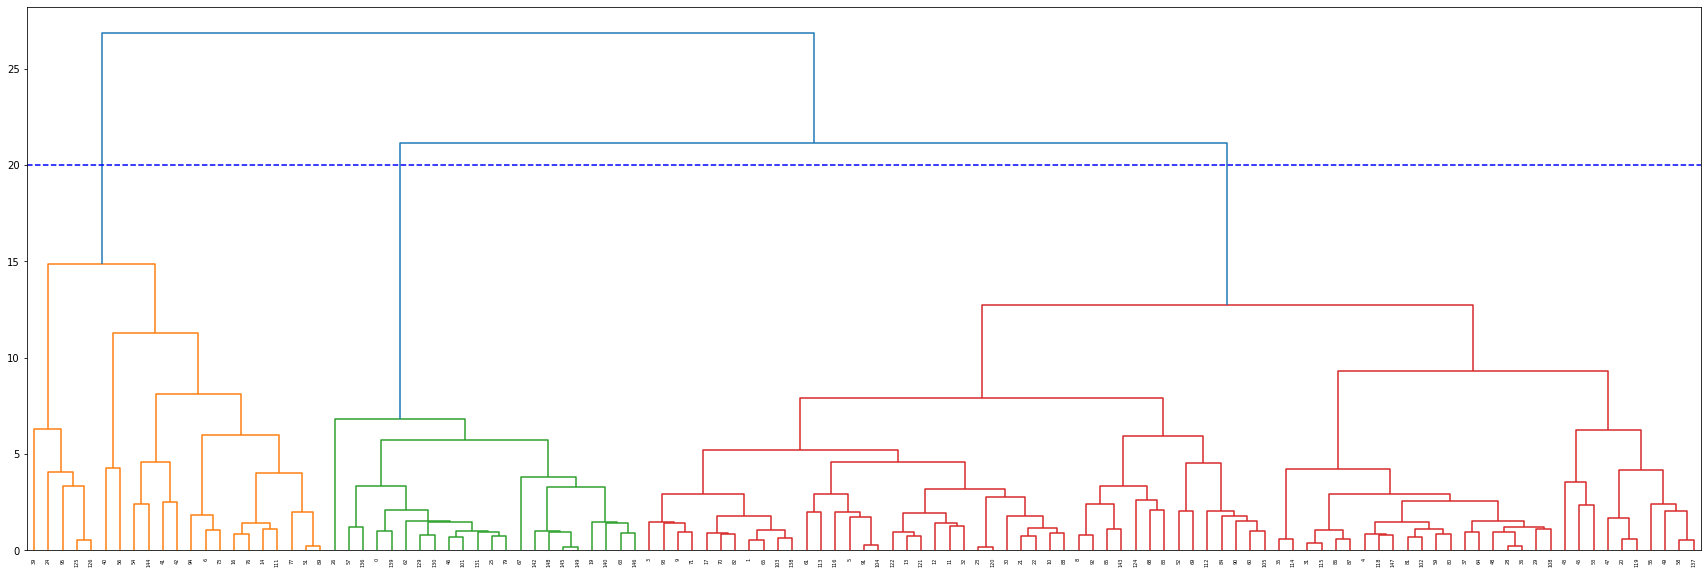

In [12]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df, method = 'ward'),labels=df.index)
dendrogrm 
plt.axhline(y=20,color='b',linestyle='--')

In [15]:
hc1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc1 = hc1.fit_predict(df)
y_hc1

array([2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 0, 2, 2, 1, 2, 2], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


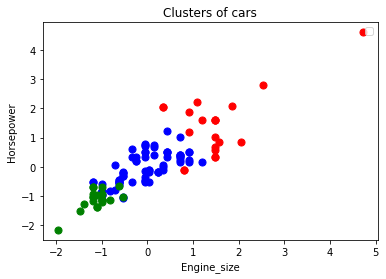

In [30]:
plt.scatter(df['Engine_size'][y_hc1 == 0], df['Horsepower'][y_hc1 == 0], s = 50, c = 'red')
plt.scatter(df['Engine_size'][y_hc1 == 1], df['Horsepower'][y_hc1 == 1], s = 50, c = 'blue')
plt.scatter(df['Engine_size'][y_hc1 == 2], df['Horsepower'][y_hc1 == 2], s = 50, c = 'green')
plt.title('Clusters of cars')
plt.xlabel('Engine_size')
plt.ylabel('Horsepower')
plt.legend()
plt.show()

In [16]:
df2['HC']=y_hc1
df2

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,HC
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,2
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,1
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,1
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,1
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,Golf,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,1/24/2011,46.943877,2
146,Volkswagen,Jetta,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237,2
147,Volkswagen,Passat,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381,1
148,Volkswagen,Cabrio,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,5/31/2011,48.907372,2


In [17]:
df['HC']=y_hc1
df

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,HC
0,-0.564554,-0.317230,-1.188519,-0.707601,-0.764273,-1.106603,-1.110752,-1.152084,-1.220853,0.884790,-0.648864,2
1,-0.263968,0.172510,0.143989,0.749354,0.096494,-0.253125,0.375767,0.324491,-0.162192,0.200734,0.640645,1
3,-0.676024,1.137795,0.429526,0.492244,0.907361,0.059816,0.644065,0.884513,0.049540,-0.483322,0.641385,1
4,-0.518017,-0.140498,-1.188519,-0.536195,-0.589625,-0.850559,-0.704679,-0.548336,-0.373924,0.656772,-0.473601,1
5,-0.539653,0.566432,-0.236728,0.320838,0.171343,1.396931,0.310505,0.398488,0.181873,-0.483322,0.375435,1
...,...,...,...,...,...,...,...,...,...,...,...,...
145,-0.660329,-0.785677,-0.998161,-1.136117,-1.051195,-0.822110,-1.770621,-0.936820,-0.876788,0.428753,-1.090627,2
146,0.329268,-0.657919,-0.998161,-1.136117,-1.051195,-0.822110,-1.118003,-0.792190,-0.876788,0.428753,-1.063569,2
147,-0.107179,-0.338523,-1.188519,-0.536195,-0.115579,-0.765212,-0.262349,-0.472658,-0.373924,0.656772,-0.515542,1
148,-0.662898,-0.424405,-0.998161,-1.136117,-1.238318,-1.277298,-1.980909,-0.412115,-1.088521,0.428753,-1.014112,2


In [18]:
X=df.drop('HC',axis=1)
y=df['HC']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=88)

In [20]:
logmodel=LogisticRegression()

In [21]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [22]:
y_pred=logmodel.predict(X_test)

In [23]:
accuracy_score(y_test,y_pred)

1.0

In [24]:
pd.DataFrame(logmodel.coef_,columns=X.columns)

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,-0.147076,0.791518,0.958459,0.736561,0.254958,1.292070,0.793245,0.352630,0.725283,-0.567499,0.770148
1,-0.050174,-0.251839,-0.542980,0.025692,0.484041,0.105791,0.191264,0.505273,-0.043575,0.214389,-0.038471
2,0.197251,-0.539679,-0.415479,-0.762252,-0.738999,-1.397862,-0.984509,-0.857903,-0.681708,0.353110,-0.731677
